In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sns.set_style("whitegrid", {'axes.grid' : False})

%matplotlib notebook

In [9]:
# read data and calculate income inequality and minority percentage

race = pd.read_excel('ACS_2014_5YR_RACE.xlsx')
econ = pd.read_excel('ACS_2014_5YR_ECON.xlsx')
df = pd.merge(race,econ,how='inner')
df.columns = ['ID','County','Population','White','Black and African American','American Indian','Asian','Hawaiian and Pacific Islander','Other','Hispanic','No. of households','Median household income','Mean household income']
df['Income inequality'] = (df['Mean household income']-df['Median household income'])/df['Median household income']
df['Minorities'] = df['Population']-df['White']
df['Minority percentage'] = 100*df['Minorities']/df['Population']
df.sort_values(['Income inequality'],ascending=False,inplace=True)

dfsml = df[(df['Population']<10000)]
dfmed = df[(df['Population']>10000) & (df['Population']<100000)]
dflrg = df[(df['Population']>100000) & (df['Population']<1000000)]
dfhug = df[(df['Population']>1000000)]

# change your state here
dfMD = df[(df['County'].str.contains(', Maryland')) & ~(df['County'].str.contains('Anne Arundel'))]
dfAA = df[(df['County'].str.contains(', Maryland')) & (df['County'].str.contains('Anne Arundel'))]
df = df[~(df['County'].str.contains(', Maryland'))]

<IPython.core.display.Javascript object>


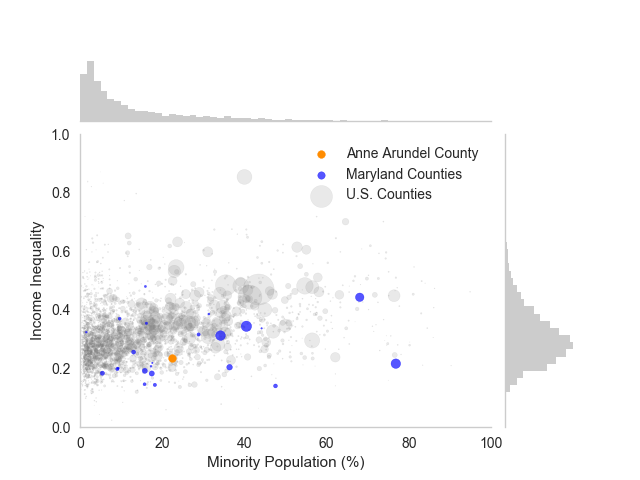

In [11]:
# plot income inequality ((mean-median)/median) vs. minority population percentage

minp = df['Minority percentage'].as_matrix()
minn = df['Minorities'].as_matrix()
ineq = df['Income inequality'].as_matrix()
noho = df['No. of households'].as_matrix()
popu = df['Population'].as_matrix()

minpMD = dfMD['Minority percentage'].as_matrix()
minnMD = dfMD['Minorities'].as_matrix()
ineqMD = dfMD['Income inequality'].as_matrix()
nohoMD = dfMD['No. of households'].as_matrix()
popuMD = dfMD['Population'].as_matrix()

minpAA = dfAA['Minority percentage'].as_matrix()
minnAA = dfAA['Minorities'].as_matrix()
ineqAA = dfAA['Income inequality'].as_matrix()
nohoAA = dfAA['No. of households'].as_matrix()
popuAA = dfAA['Population'].as_matrix()

fig = plt.figure()

gs = gridspec.GridSpec(5,6)
gs.update(wspace=.2, hspace=.2)

ax2 = fig.add_subplot(gs[0,:-1])
ax1 = fig.add_subplot(gs[-1:,-1:])
ax4 = fig.add_subplot(gs[1:,0:-1])
ax3 = fig.add_subplot(gs[1:,-1:])

ax1.axis('off')

mf = ax4.scatter(minp, ineq, s=(noho/noho.max())*500, alpha=1/6, color='gray', label='U.S. Counties')
mfMD = ax4.scatter(minpMD, ineqMD, s=(nohoMD/noho.max())*500, alpha=2/3, color='b', label='Maryland Counties')
mfAA = ax4.scatter(minpAA, ineqAA, s=(nohoAA/noho.max())*500, alpha=1, color='darkorange', label='Anne Arundel County')
ax4.set_ylim([0,1])
ax4.set_xlim([0,100])
ax4.set_xlabel('Minority Population (%)')
ax4.set_ylabel('Income Inequality')
ax4.legend(handles=[mfAA,mfMD,mf])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax2.hist(minp, bins=57, normed=True, color='gray', alpha=.4)
ax2.set_xlim([0,100])
ax2.set_xticklabels('')
ax2.set_yticklabels('')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax3.hist(ineq, bins=50, orientation='horizontal', normed=True, color='gray', alpha=.4)
ax3.set_ylim([0,1])
ax3.set_xticklabels('')
ax3.set_yticklabels('')
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)

fig.savefig("incomeineq_vs_minoritypop.pdf", bbox_inches='tight')